In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.metrics import accuracy_score

C:\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
product = pd.read_csv("Product.csv")
product.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
# dropping user id and gender cols to make the model more accurate and simple to train
X = product.iloc[:,[2,3]]
X

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [4]:
Y = product.iloc[:,[4]]
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [5]:
def euclidean(x1,x2):
    distance = np.sqrt(np.sum(x1-x2)**2)
    return distance

In [6]:
def KNN(X_train, X_test, Y_train,y_test, k_val):
    y_bar = []
    for pt in X_test.to_numpy():
        distances_list = []
        for i in range(len(X_train)):
            distances_list.append(euclidean((np.array(X_train.iloc[i])), pt))

        distance_DT = pd.DataFrame(data= distances_list, columns=['distance'], index=Y_train.index)
        K_neighbors = distance_DT.sort_values(by = ['distance'], axis=0)[:k_val]

        labels = Y_train.loc[K_neighbors.index]

        majority = mode(labels).mode[0]

        y_bar.append(majority)
    return y_bar 

In [7]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
np.shape(X_train)


(320, 2)

In [8]:
model = KNN(X_train,X_test,Y_train,Y_test, k_val=3)

In [9]:
accuracy_score(Y_test,model)

0.7375

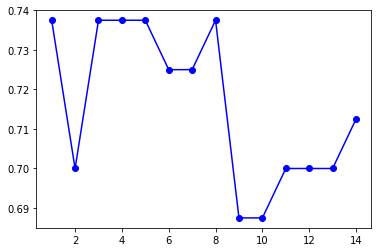

In [10]:
max_accuracy = []
for i in range(1,15):
    model = KNN(X_train,X_test,Y_train,Y_test, k_val=i)
    max_accuracy.append(accuracy_score(Y_test,model))

plt.plot(range(1,15), max_accuracy, color = 'blue', marker='o')

In [12]:
model2 = KNN(X_train,X_test,Y_train,Y_test, k_val=5)

In [13]:
accuracy_score(Y_test,model2)

0.7375

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

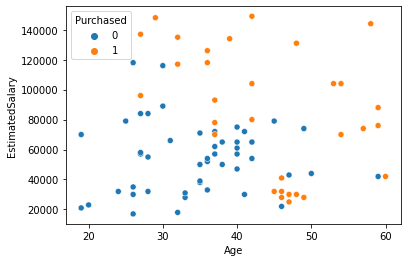

In [11]:
import seaborn as sns
sns.scatterplot(data= product, x = X_test['Age'], y = X_test['EstimatedSalary'], hue= 'Purchased')